<a href="https://colab.research.google.com/github/mafiTec/Suicide-numbers-prediction-using-LR-and-Rm/blob/main/Suicide_numbers_prediction_using_LR_and_Rm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KAG-2 PRO/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df.drop(['country-year','HDI for year','suicides/100k pop'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6    gdp_for_year ($)   27820 non-null  object
 7   gdp_per_capita ($)  27820 non-null  int64 
 8   generation          27820 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.9+ MB


In [7]:
df[' gdp_for_year ($) '].replace(',','',regex=True,inplace=True)
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype(int)




In [8]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()




In [9]:
le = preprocessing.LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['age']=le.fit_transform(df['age'])
df['country']=le.fit_transform(df['country'])
df['generation']=le.fit_transform(df['generation'])


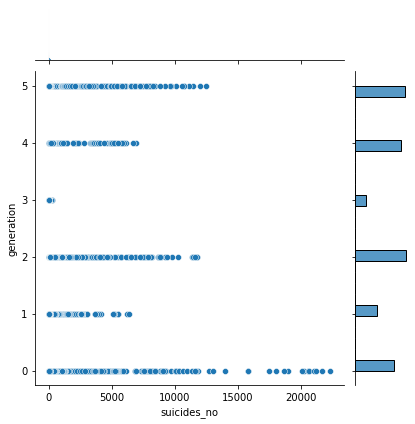

In [10]:
sns.jointplot(x='suicides_no', y='generation', data = df)

<Figure size 1440x720 with 0 Axes>

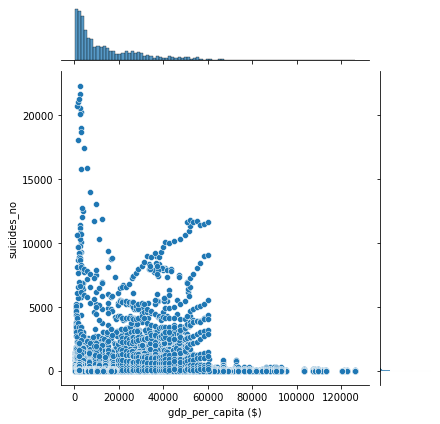

In [11]:
plt.figure(figsize=(20,10))
sns.jointplot(x='gdp_per_capita ($)',y='suicides_no', data = df)

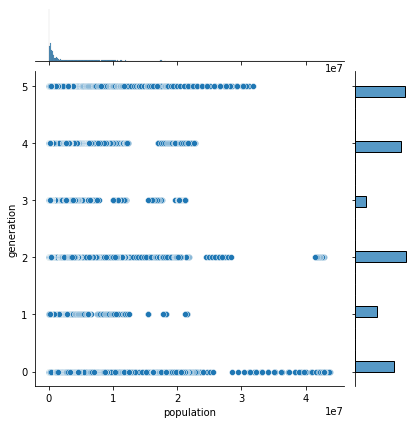

In [12]:
sns.jointplot(x='population',y='generation', data = df)

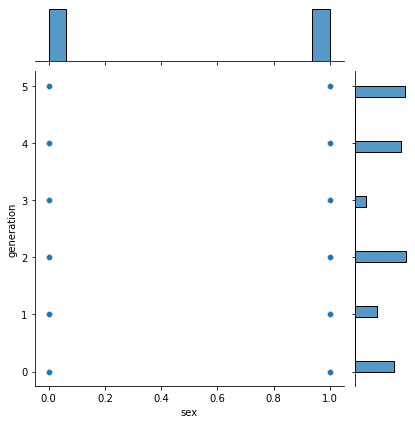

In [13]:
sns.jointplot(x='sex',y='generation', data = df)

In [14]:
#sns.pairplot(df)

In [30]:
corr = df.corr()
corr

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
country,1.000000e+00,0.022769,-5.217358e-20,2.535676e-05,0.118555,0.158896,1.635832e-01,5.334082e-02,6.068990e-03
year,2.276923e-02,1.000000,0.000000e+00,-5.858810e-04,-0.004546,0.008850,9.452857e-02,3.391343e-01,2.683006e-01
sex,-5.217358e-20,0.000000,1.000000e+00,-2.428929e-19,0.144629,-0.011242,-7.757932e-19,1.336263e-18,-4.145525e-19
age,2.535676e-05,-0.000586,-2.428929e-19,1.000000e+00,-0.018256,-0.093361,6.084189e-05,-1.567976e-04,2.148529e-01
suicides_no,1.185555e-01,-0.004546,1.446292e-01,-1.825626e-02,1.000000,0.616162,4.300959e-01,6.132975e-02,-7.062371e-02
population,1.588961e-01,0.008850,-1.124208e-02,-9.336148e-02,0.616162,1.000000,7.106973e-01,8.150986e-02,-6.796261e-02
gdp_for_year ($),1.635832e-01,0.094529,-7.757932e-19,6.084189e-05,0.430096,0.710697,1.000000e+00,3.034045e-01,2.125070e-02
gdp_per_capita ($),5.334082e-02,0.339134,1.336263e-18,-1.567976e-04,0.061330,0.081510,3.034045e-01,1.000000e+00,8.289921e-02
generation,6.068990e-03,0.268301,-4.145525e-19,2.148529e-01,-0.070624,-0.067963,2.125070e-02,8.289921e-02,1.000000e+00


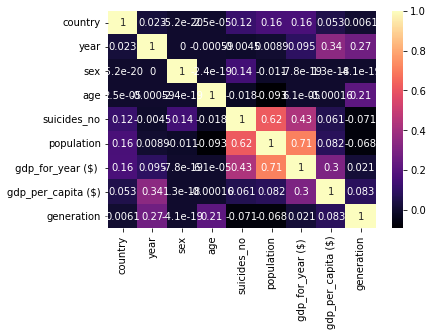

In [31]:
sns.heatmap(data=df.corr(),annot=True,cmap='magma');

In [15]:
df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [16]:
x = df[['country', 'year', 'sex', 'age',  'population',
        ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation']]

In [17]:
y = df['suicides_no']

In [18]:
from sklearn.model_selection import train_test_split      

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [21]:
lm.fit(x_train, y_train)

LinearRegression()

In [22]:
print(lm.coef_)

[ 6.55840041e-01 -4.03581172e-01  2.70307327e+02  2.40974138e+01
  1.43625243e-04 -1.24502630e-11  9.29504847e-04 -1.82271182e+01]


In [23]:
prediction = lm.predict(x_test)

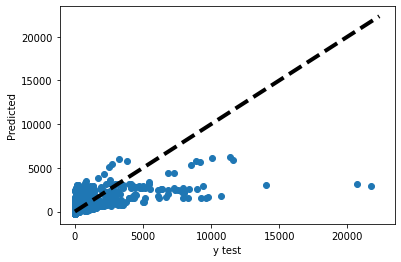

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y test')
ax.set_ylabel('Predicted')
plt.show()

In [25]:
import sklearn.metrics as metrics 
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
metrics.r2_score(y_test, prediction)


MAE: 264.3389407796718
MSE: 485287.26167630526
RMSE: 696.6256251935506


0.4179862100416861

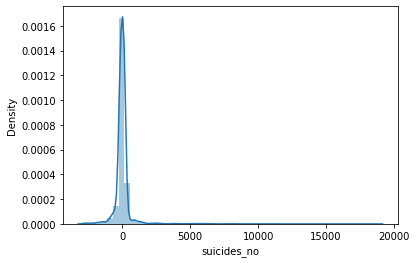

In [26]:
sns.distplot((y_test-prediction))

In [27]:
pd.DataFrame(lm.coef_ , x.columns, columns=["Coeffecient"] )

,Coeffecient
country,6.558400e-01
year,-4.035812e-01
sex,2.703073e+02
age,2.409741e+01
population,1.436252e-04
gdp_for_year ($),-1.245026e-11
gdp_per_capita ($),9.295048e-04
generation,-1.822712e+01


In [267]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.33, random_state=42)

In [268]:
train_x = train.drop(['suicides_no'], axis = 1)
train_y = train['suicides_no']             

val_x = val.drop(['suicides_no'], axis = 1)
val_y = val['suicides_no']

In [269]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (18639, 8)
Dimension of train_y dataframe: (18639,)
Dimension of val_x dataframe: (9181, 8)
Dimension of val_y dataframe: (9181,)


In [270]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(train_x, train_y)

RandomForestRegressor()

In [271]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = regr.predict(val_x)
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))
print('Accuracy:',regr.score(val_x,val_y))

Mean Square Error of linear regression: 16206.263532436553
R_Squared Score of linear regression: 0.9768368423661629
Accuracy: 0.9776909090805515


In [272]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

pred = model.predict(x_test)

In [273]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'root mean squared error {rmse}')
print("Accuracy: ", model.score(x_test,y_test))
print('r2_score',r2_score(y_test,pred))

root mean squared error 113.48346851678252
Accuracy:  0.9845545848726069
r2_score 0.9845545848726069
